## LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## DATA PREPROCESSING

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

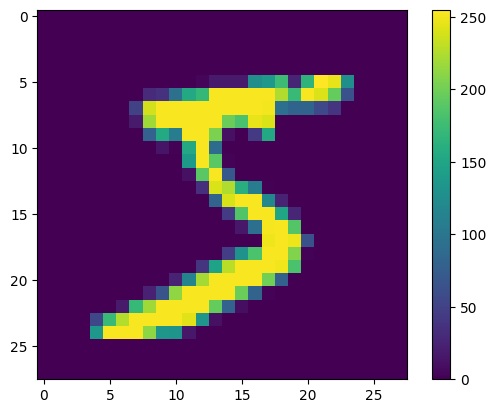

In [3]:
plt.imshow(x_train[0])
plt.colorbar()

In [4]:
y_train[0]

5

In [5]:
x_train.min(), x_train.max()

(0, 255)

In [6]:
y_train.min(), y_train.max()

(0, 9)

In [7]:
# Normalizing the images

x_train = x_train / 255.0
x_test = x_test / 255.0

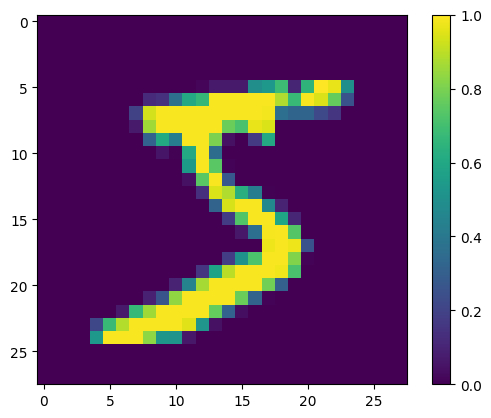

In [8]:
plt.imshow(x_train[0])
plt.colorbar()

In [9]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [10]:
# reshape images
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [12]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
input_shape = x_train[0].shape

In [14]:
input_shape

(28, 28, 1)

## MODEL BUILDING

In [15]:
model = tf.keras.models.Sequential()

In [16]:
# first cnn
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))


# second cnn
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# dropout layer
model.add(tf.keras.layers.Dropout(0.4))

# flatten layers
model.add(tf.keras.layers.Flatten())

# Fully conected layers

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

#output
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


c:\Users\micke\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

## TRAINING MODEL

In [19]:
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.3637 - sparse_categorical_accuracy: 0.8849
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0578 - sparse_categorical_accuracy: 0.9820
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0372 - sparse_categorical_accuracy: 0.9888
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0274 - sparse_categorical_accuracy: 0.9915
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0207 - sparse_categorical_accuracy: 0.9932
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0150 - sparse_categorical_accuracy: 0.9951
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0136 - sparse_categorical_accuracy: 0.9951
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0112 - sparse_categorical_accuracy: 0.9964
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0122 - sparse_categorical_accuracy: 0.9960
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s

In [20]:
model.save('5.model.h5')

In [21]:
# model predictions

y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
y_pred[100], y_test[100]

(6, 6)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 973,    0,    1,    1,    0,    0,    2,    0,    2,    1],
       [   0, 1134,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    1, 1023,    0,    0,    0,    0,    6,    2,    0],
       [   0,    0,    0, 1007,    0,    3,    0,    0,    0,    0],
       [   0,    0,    0,    0,  978,    0,    1,    0,    0,    3],
       [   1,    0,    0,    6,    0,  883,    1,    0,    1,    0],
       [   3,    3,    0,    0,    2,    1,  944,    0,    5,    0],
       [   1,    5,    3,    1,    0,    0,    0, 1017,    1,    0],
       [   1,    1,    1,    0,    1,    0,    0,    0,  970,    0],
       [   0,    1,    0,    0,    8,    2,    0,    3,    0,  995]],
      dtype=int64)

In [24]:
acc = accuracy_score(y_test, y_pred)
acc

0.9924